# Analyze and compare all LLMs
---

This notebook loads all Pulse LLMs and compares the best versions of them. 

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
# Path to LLM output folder
outputfolder_path_list = [
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms"
]

In [3]:
model_list = []
#list all models in the output folder
for output_folder in outputfolder_path_list:
    # List all child folders (directories) in the output folder
    child_folders = [
        name for name in os.listdir(output_folder)
        if os.path.isdir(os.path.join(output_folder, name))
    ]
    model_list.extend(child_folders)

In [4]:
best_approach = LLMAnalyzer.find_best_prompting_id(
    outputfolder_path_list[0], model_list, metric="mcc"
)
best_approach

,deepseekr1llama8b,gemini2p5flash,gemma3,gpt4o,llama3p18b,medgemma4b,mistral7b
prompting_id,zhu_2024b_zero_shot_preprocessor,zhu_b_0shot_0think,zhu_2024b_zero_shot_preprocessor,sarvari_2024_aggregation_preprocessor,liu_2023_few_shot_preprocessor,None,
metric_value,0.106,0.168,0.043667,0.165111,0.164889,None,0.010778
metrics_report_path,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,None,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...


In [5]:
df_all_metrics = pd.DataFrame()
for model in best_approach.columns:
    if best_approach[model] is not None:
        metrics_report_path = best_approach[model]["metrics_report_path"]
        prompting_id = best_approach[model]["prompting_id"]
        print(f"Model: {model}, Prompting ID: {prompting_id}")
        
        # Load the metrics report
        df_temp = LLMAnalyzer.load_metrics_report_as_df(metrics_report_path)
        df_all_metrics = pd.concat([df_all_metrics, df_temp])
    else:
        print(f"No valid report found for model: {model}")
df_all_metrics

Model: deepseekr1llama8b, Prompting ID: zhu_2024b_zero_shot_preprocessor
Model: gemini2p5flash, Prompting ID: zhu_b_0shot_0think
Model: gemma3, Prompting ID: zhu_2024b_zero_shot_preprocessor
Model: gpt4o, Prompting ID: sarvari_2024_aggregation_preprocessor
Model: llama3p18b, Prompting ID: liu_2023_few_shot_preprocessor
Model: medgemma4b, Prompting ID: None
Error loading metrics report: expected str, bytes or os.PathLike object, not NoneType
Model: mistral7b, Prompting ID: 


,model_id,task_id,dataset,prompting_id,run_id,metric_auroc,metric_auprc,metric_normalized_auprc,metric_specificity,metric_f1_score,metric_accuracy,metric_balanced_accuracy,metric_precision,metric_recall,metric_mcc,metric_kappa,metric_minpse
0,DeepseekR1Llama8b,aki,eicu,zhu_2024b_zero_shot_preprocessor,20250613_112431,0.586,0.392,1.264,0.820,0.342,0.655,0.554,0.419,0.289,0.123,0.119,0.382
1,DeepseekR1Llama8b,mortality,eicu,zhu_2024b_zero_shot_preprocessor,20250613_112431,0.661,0.234,3.344,0.613,0.208,0.620,0.664,0.122,0.714,0.170,0.101,0.135
2,DeepseekR1Llama8b,sepsis,eicu,zhu_2024b_zero_shot_preprocessor,20250613_112431,0.520,0.054,1.134,0.569,0.097,0.565,0.529,0.054,0.489,0.025,0.012,0.054
0,Gemini2p5flash,mortality,eicu,zhu_b_0shot_0think,20250617_214747,0.830,0.389,5.560,0.731,0.270,0.730,0.723,0.167,0.714,0.248,0.177,0.300
1,Gemini2p5flash,aki,eicu,zhu_b_0shot_0think,20250619_150123,0.609,0.499,1.609,0.853,0.406,0.693,0.595,0.507,0.338,0.218,0.210,0.377
2,Gemini2p5flash,sepsis,eicu,zhu_b_0shot_0think,20250619_150123,0.613,0.057,1.190,0.700,0.104,0.685,0.541,0.060,0.383,0.038,0.023,0.070
0,Gemma3,aki,eicu,zhu_2024b_zero_shot_preprocessor,20250608_180109,0.610,0.279,0.902,0.196,0.476,0.405,0.534,0.328,0.872,0.083,0.047,0.409
1,Gemma3,mortality,eicu,zhu_2024b_zero_shot_preprocessor,20250608_180109,0.505,0.535,7.648,0.000,0.131,0.070,0.500,0.070,1.000,0.000,0.000,0.071
2,Gemma3,sepsis,eicu,zhu_2024b_zero_shot_preprocessor,20250608_180109,0.611,0.035,0.738,0.045,0.096,0.091,0.523,0.050,1.000,0.048,0.005,0.064
0,GPT4o,mortality,eicu,sarvari_2024_aggregation_preprocessor,20250623_084058,0.698,0.359,5.129,0.806,0.276,0.790,0.689,0.182,0.571,0.233,0.190,0.429


C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:477: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


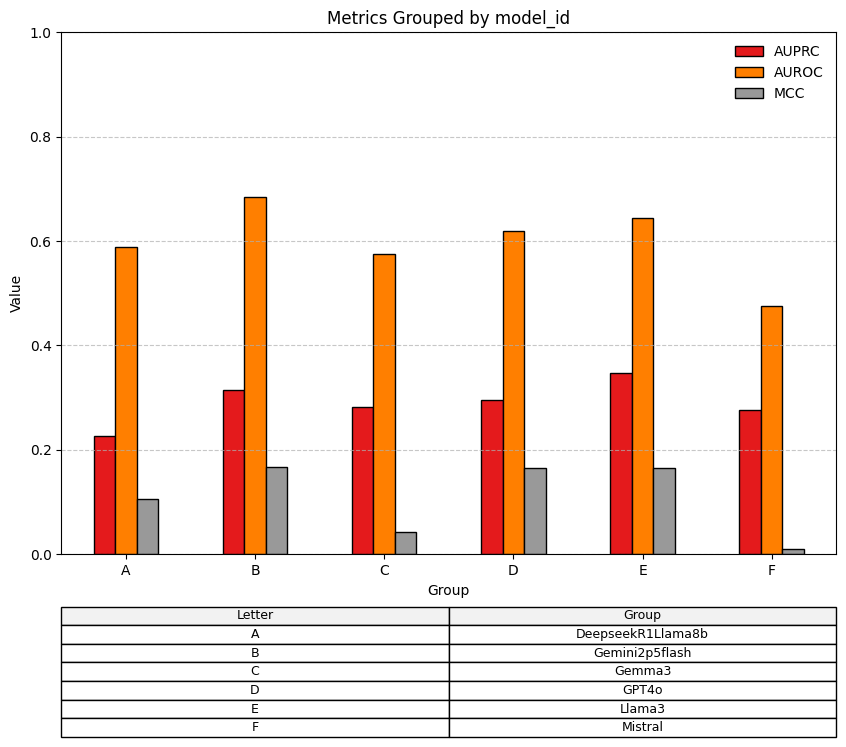

In [10]:
LLMAnalyzer.plot_metrics(df_all_metrics, group=['model_id'], titel_prefix='')